In [ ]:
from google.colab import files
import pandas as pd
# Baca file CSV yang sudah di-upload
df = pd.read_excel('coba yang ini.xlsx')

# Tampilkan 10 baris pertama
df.head(10)

,nilai ekspor
0,14028.1
1,12788.6
2,14447.8
3,13068.1
4,14751.9
5,11763.4
6,15238.4
7,14262.0
8,14080.1
9,14881.5


75 75


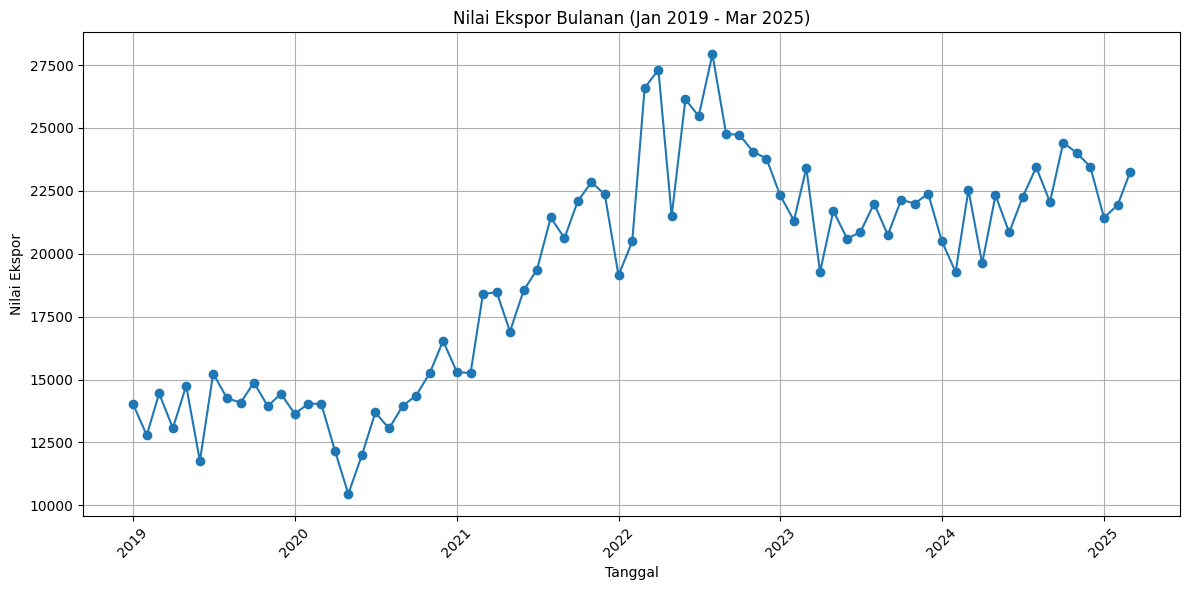

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
df = pd.read_excel('coba yang ini.xlsx')

# Buat range tanggal bulanan dari 2019-01 sampai 2025-03
dates = pd.date_range(start='2019-01-01', end='2025-03-01', freq='MS')  # MS = Month Start

# Pastikan panjangnya sama dengan data nilai ekspor
print(len(dates), len(df))

# Tambahkan kolom tanggal ke dataframe
df['Tanggal'] = dates

# Plot data
plt.figure(figsize=(12,6))
plt.plot(df['Tanggal'], df['nilai ekspor'], marker='o')
plt.title('Nilai Ekspor Bulanan (Jan 2019 - Mar 2025)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Ekspor')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2025-04-01    22271.522819
2025-05-01    20095.444947
2025-06-01    21779.924256
2025-07-01    23065.435501
2025-08-01    23300.589721
2025-09-01    22353.696190
2025-10-01    22932.587975
2025-11-01    22702.054018
2025-12-01    22915.026588
Freq: MS, dtype: float64


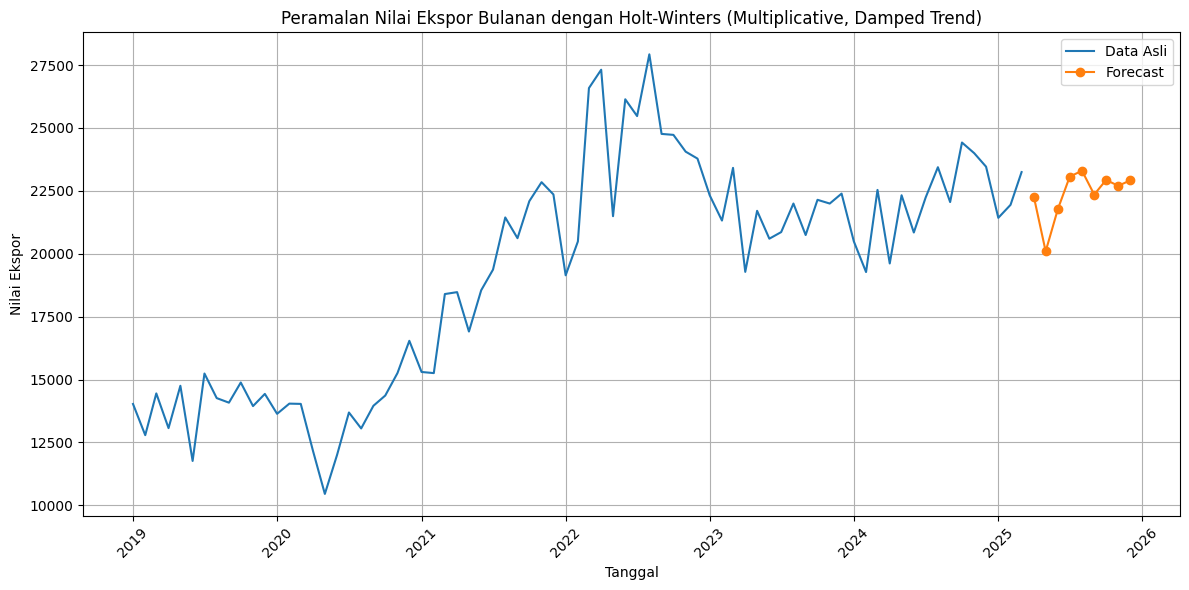

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Baca data
df = pd.read_excel('coba yang ini.xlsx')

# Buat tanggal bulanan dari 2019-01 sampai 2025-03 (sesuaikan dengan data)
dates = pd.date_range(start='2019-01-01', end='2025-03-01', freq='MS')
df['Tanggal'] = dates

# Set index ke kolom tanggal untuk analisis time series
df.set_index('Tanggal', inplace=True)

# Pisahkan data nilai ekspor sebagai series
data = df['nilai ekspor']

# Bangun model Holt-Winters dengan komponen seasonal multiplicative dan damped trend
model = ExponentialSmoothing(
    data,
    trend='add',           # Trend additive
    damped_trend=True,     # Damped trend
    seasonal='mul',        # Seasonal multiplicative
    seasonal_periods=12    # Karena data bulanan, periode musiman 12 bulan
).fit()

# Forecast dari April 2025 sampai Desember 2025 (9 bulan)
forecast_period = 9
forecast = model.forecast(forecast_period)

# Tampilkan hasil forecast
print(forecast)

# Plot data asli dan hasil forecast
plt.figure(figsize=(12,6))
plt.plot(data.index, data, label='Data Asli')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Peramalan Nilai Ekspor Bulanan dengan Holt-Winters (Multiplicative, Damped Trend)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Ekspor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
